### In this section, we are preprocessin the data which is going to feed our algorithms

In [2]:
#Uncommented this section if you need to install this package
#pip install librosa

In [2]:
# Acessing the audio files

# importing the "tarfile" module
import tarfile
import os
import pandas as pd
import numpy as np
import IPython
import random
import librosa
import matplotlib.pyplot as plt

In [3]:
# function to go through access all in a folder
def unpacking(folder_path, destination):
# list of all files in the folder
    file_list = os.listdir(folder_path)
    #opening all files in the folder
    for file_name in file_list:
        if file_name.endswith('.tar.gz'):
            # Constructing full file path 
            file_path = os.path.join(folder_path, file_name) 
            # open file
            with tarfile.open(file_path, 'r:gz') as file:
                # extracting file
                file.extractall(path = destination)
            print("Unpacked " + file_name)
        else:
            print("Skipping " + file_name + " because not a .tar.gz file.")
        

In [4]:
folder_path = "C:\\Users\\celin\\OneDrive - CBS - Copenhagen Business School\\Masterstudium\\Machine Learning\\Final\\Data_raw"
destination = os.path.join(folder_path, "unpacked")

In [5]:
#unpacking(folder_path, destination)

In [6]:
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

In [7]:
# Function to sample mp3 files
def sample_audio(language_mp3_path):
    language_list = os.listdir(language_mp3_path)
    language_dic = {"de" : "German",
                   "en" : "English",
                   "es" : "Spanish"}
    for language in language_list:
        if language in language_dic:
            language_name = language_dic[language]
        else:
            print("Unknown language!")
            language_name = language
        language_path = os.path.join(language_mp3_path, language)
        clips_path = os.path.join(language_path, "clips")
        # get a list of all files in the folder
        mp3_list = os.listdir(clips_path)
        # choose a random file from the list
        random_file = random.choice(mp3_list)
        # Play random file 
        print("Playing a random file in the following language " + language_name)
        print(random_file)
        mp3_path = os.path.join(clips_path, random_file)
        
        # mp3_sample
        IPython.display.Audio(mp3_path)
        
        # Numerical presentation of audio data  
        y,sr = librosa.load(mp3_path,sr=22050)
        print(y)
        
        # Summary information
        print('y shape:', len(y))
        print('Sample Rate (KHz):', sr)
        # Verify length of the audio
        print('Check Len of Audio:', int(len(y))/int(sr))
        print('\n')
        
        # plot raw waveform
        plt.figure(figsize = (16, 6))
        librosa.display.waveshow(y = y, sr = sr, color = "#A300F9", axis = 's')
        plt.title("Raw audio example sound waves in " +  language_name , fontsize = 20)
        plt.show();
        
        # plot zoomed in raw audio
        plt.figure(figsize = (16, 6))
        librosa.display.waveshow(y = y[30000:30500], sr = sr, color = "#A100B1");
        plt.title("Raw audio - zoomed in", fontsize = 20)
        plt.show();

        # transform y into melspectogram represenation
        y_melspec = librosa.amplitude_to_db(np.abs(librosa.stft(y) ), ref=np.max)
        # plot melspectogram
        plt.figure(figsize = (16, 6))
        librosa.display.specshow(y_melspec, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log')
        plt.colorbar()
        plt.title("Melspectogram representation", fontsize = 20)
        plt.show();
        
        # transform y into MFCC represenation
        y_mfcc = librosa.feature.mfcc(y=y, sr=sr)
        # plot MFCC
        plt.figure(figsize = (16, 6))
        librosa.display.specshow(y_mfcc, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log')
        plt.colorbar()
        plt.title("MFCC representation", fontsize = 20)
        plt.show();

Playing a random file in the following language German
common_voice_de_35328313.mp3
[ 7.2015649e-12  6.5275185e-12  3.1629987e-12 ...  1.1326380e-09
 -1.4545756e-09 -1.9125682e-10]
y shape: 227027
Sample Rate (KHz): 22050
Check Len of Audio: 10.296009070294785




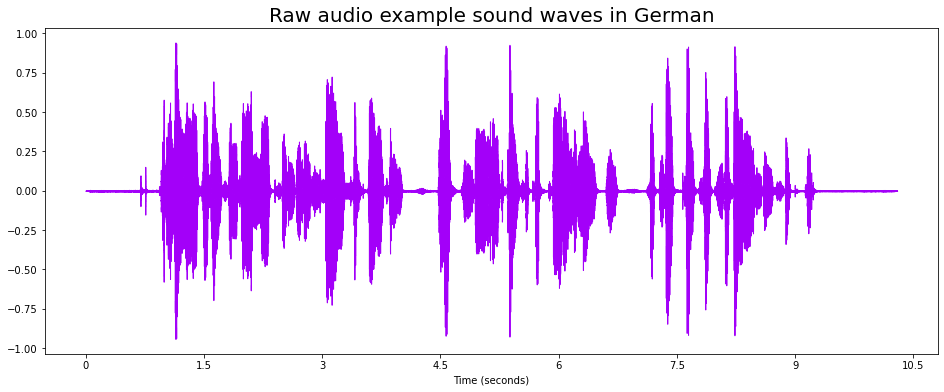

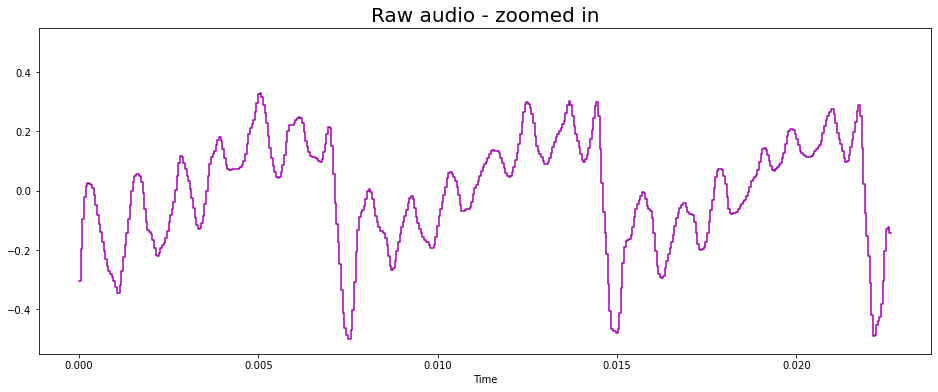

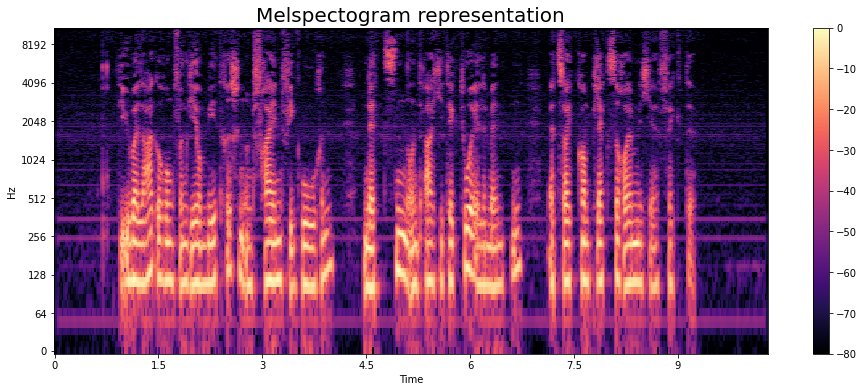

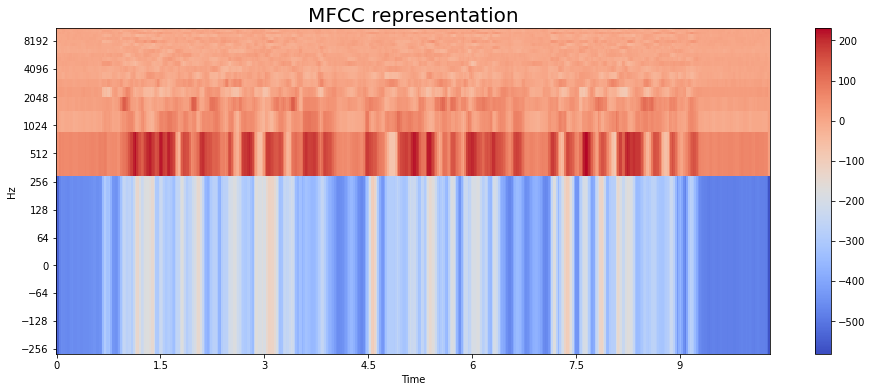

Playing a random file in the following language English
common_voice_en_35462809.mp3
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9368539e-07
 -1.4761858e-07 -5.4903690e-09]
y shape: 95256
Sample Rate (KHz): 22050
Check Len of Audio: 4.32




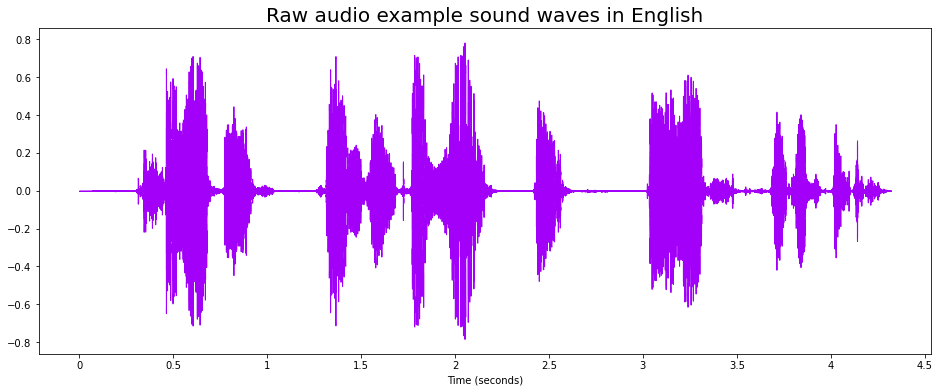

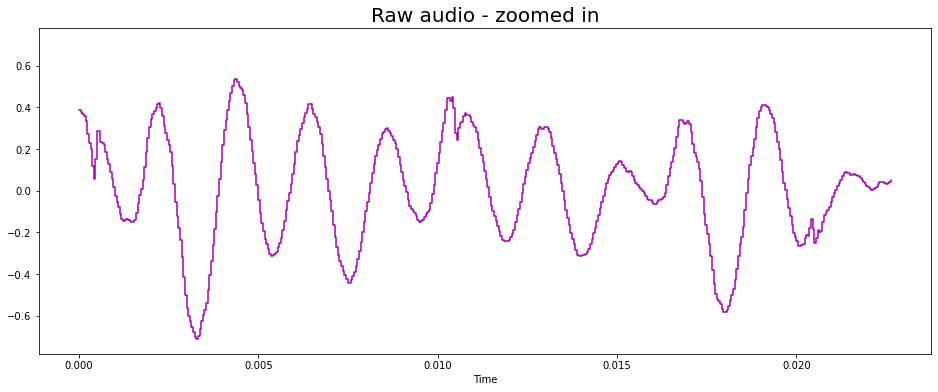

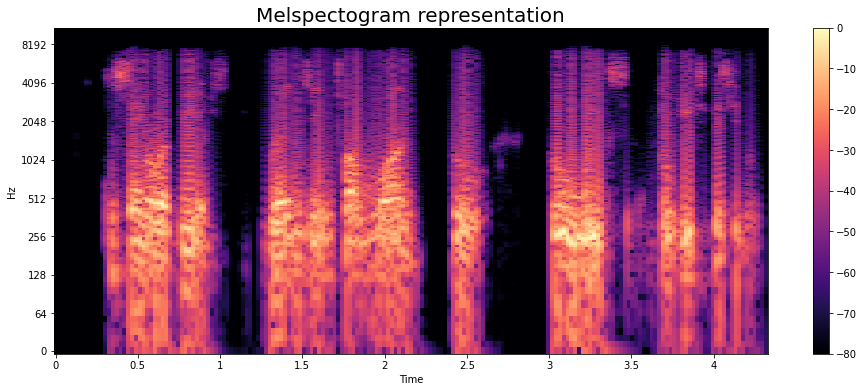

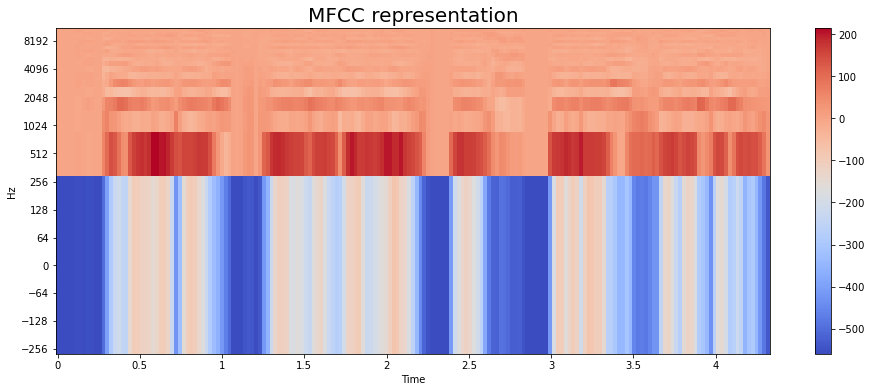

Playing a random file in the following language Spanish
common_voice_es_34926743.mp3
[ 1.1996604e-18  1.4945704e-18 -6.1078675e-19 ...  2.7744168e-06
  5.2022619e-06  5.0432359e-06]
y shape: 68267
Sample Rate (KHz): 22050
Check Len of Audio: 3.0960090702947847




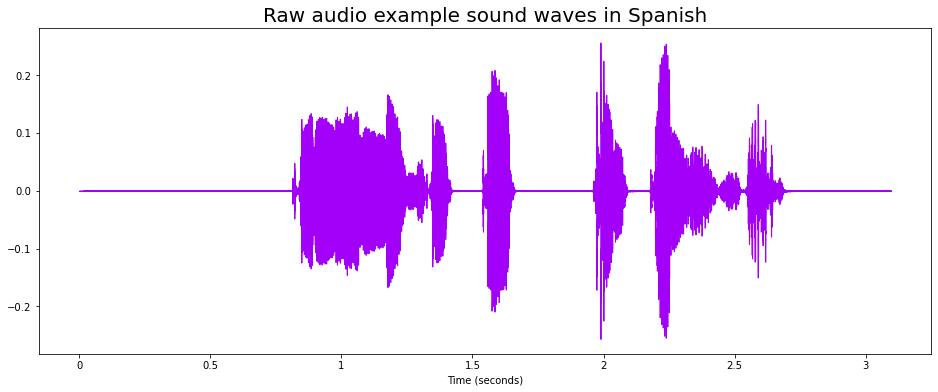

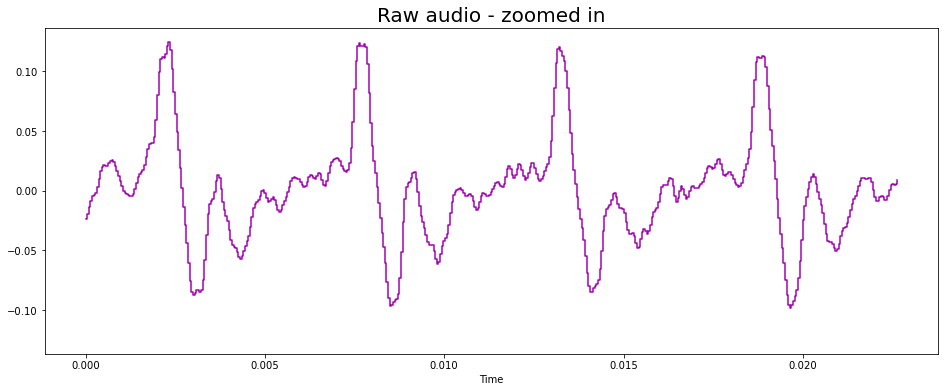

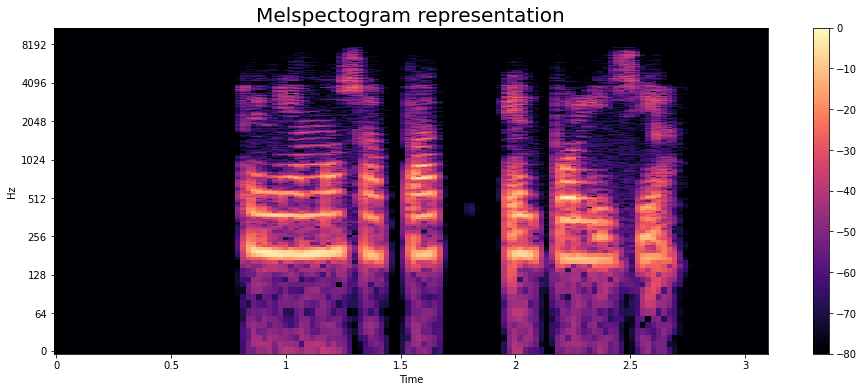

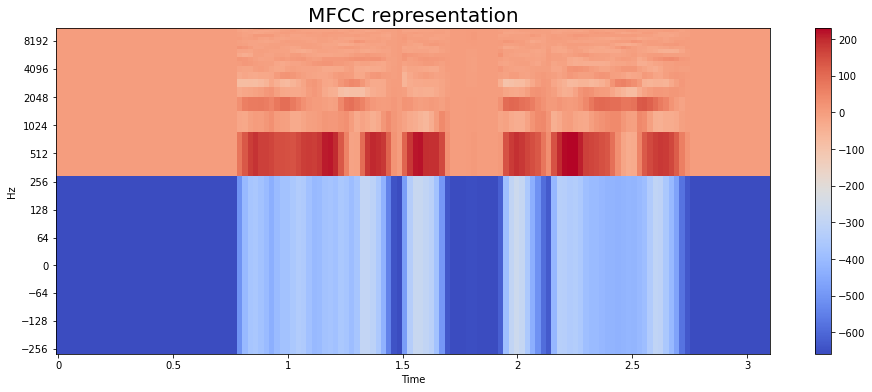

In [116]:
language_mp3_path = "C:\\Users\\celin\\OneDrive - CBS - Copenhagen Business School\\Masterstudium\\Machine Learning\\Final\\Data_raw\\unpacked\\cv-corpus-12.0-delta-2022-12-07"


sample_audio(language_mp3_path)


In [ ]:
# Minimum audio data length

In [8]:
# data load parameters
dataset_path = root_path + '/data/genres_original'
num_segments = 1
SAMPLES_PER_SEGMENT = int(SAMPLES_PER_TRACK / num_segments)

NameError: name 'root_path' is not defined

In [ ]:
language_mp3_path = "C:\\Users\\celin\\OneDrive - CBS - Copenhagen Business School\\Masterstudium\\Machine Learning\\Final\\Data_raw\\unpacked\\cv-corpus-12.0-delta-2022-12-07"

data = {
    "filename": [],
    "language": [],
    "tracks": []
    }


#num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

language_list = os.listdir(language_mp3_path)
language_dic = {"de" : "German",
                "en" : "English",
                "es" : "Spanish"}
for language in language_list:
    if language in language_dic:
        language_name = language_dic[language]
    else:
        print("Unknown language!")
        language_name = language
    language_path = os.path.join(language_mp3_path, language)
    clips_path = os.path.join(language_path, "clips")
        
    # get a list of all files in the folder
    mp3_list = os.listdir(clips_path)
    
    # looping through all mp3s in one language
    for mp3 in mp3_list:
        # adding the filename as key
        data["filename"].append(mp3)
        # adding the label/language
        data["language"].append(language_name)
        # adding the clip
        data["tracks"].append(librosa.load(os.path.join(clips_path,  mp3)))
            


In [ ]:
print(data)

In [12]:
len(data["filename"])

30

In [13]:
len(data["language"])

30

In [14]:
len(data["tracks"])

30